# Illustrating Observed and Intrinsic Object Properties:
# SDSS "Galaxy" Sizes

Let's look at the distribution of observed sizes in the SDSS photometric object catalog.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import SDSS
import pandas as pd
import matplotlib
# matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
galaxies = "SELECT top 1000 \
petroR50_i AS size, \
petroR50Err_i AS err \
FROM PhotoObjAll \
WHERE \
(type = '3' AND petroR50Err_i > 0)"
print galaxies

SELECT top 1000 petroR50_i AS size, petroR50Err_i AS err FROM PhotoObjAll WHERE (type = '3' AND petroR50Err_i > 0)


In [4]:
# Download data. This can take a while...
data = SDSS.select(galaxies)
data

,size,err
0,3.183596,0.025126
1,3.065464,0.011983
2,20.184450,12.358810
3,3.140940,0.019812
4,2.944434,0.005674
5,8.316065,5.105838
6,0.896665,0.285496
7,0.744543,0.260797
8,0.908179,0.248295
9,1.143575,0.081928


## The Distribution of Observed SDSS "Galaxy" Sizes

Let's look at a histogram of galaxy sizes, for 1000 objects classified as "galaxies".

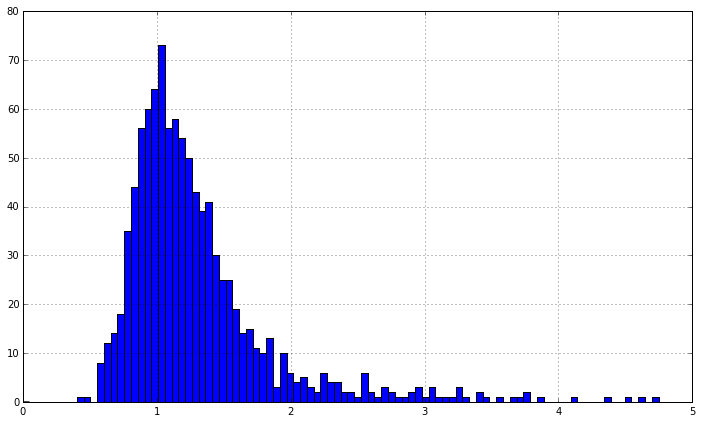

In [5]:
data['size'].hist(bins=np.linspace(0.0,5.0,100),figsize=(12,7))

Things to notice:

* No small objects (why not?)
* A "tail" to large size
* Some very large sizes that look a little odd



Are these large galaxies *actually* large, or have they just been measured that way?
Let's look at the reported uncertainties on these sizes:

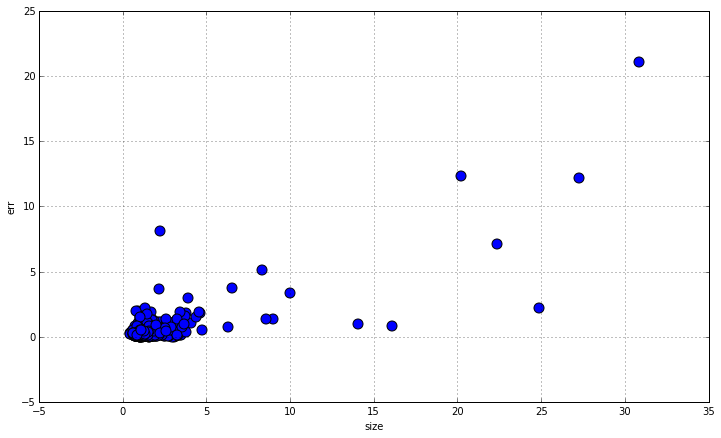

In [6]:
data.plot(kind='scatter', x='size', y='err',s=100,figsize=(12,7));

## Mock Data

Let's look at how distributions like this one can come about, by making a **generative model** for this dataset.

First, let's imagine a set of perfectly measured galaxies. They won't all have the same size, because the Universe isn't like that. Let's suppose the logarithm of their *intrinsic sizes* are drawn from a Gaussian of width $S$ and mean $\mu$. 

To model one mock galaxy, we *draw a sample from this distribution*. To model the whole dataset, we draw 1000 samples.

In [7]:
def generate_galaxies(mu=np.log10(1.5),S=0.3,N=1000):
    return pd.DataFrame({'size' : 10.0**(mu + S*np.random.randn(N))})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109d5b7d0>]], dtype=object)

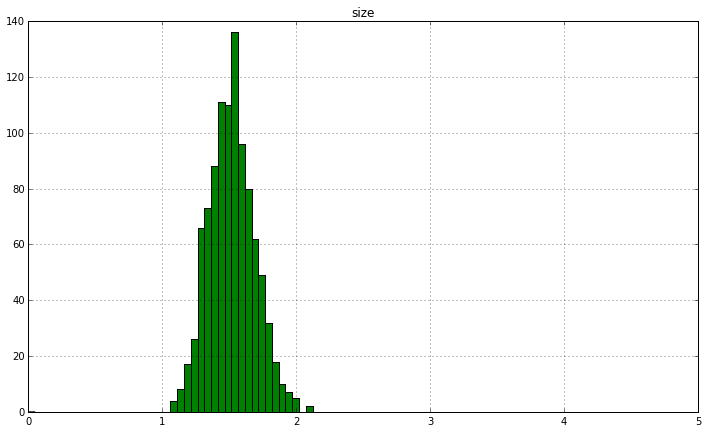

In [8]:
mu = np.log10(1.5)
S = 0.05
intrinsic = generate_galaxies(mu=mu,S=S,N=1000)

intrinsic.hist(bins=np.linspace(0.0,5.0,100),figsize=(12,7),color='green')

Now let's add some observational uncertainty. We can model this by drawing random Gaussian offsets $\epsilon$ and add one to each intrinsic size.

In [9]:
def make_noise(sigma=0.3,N=1000):
    return pd.DataFrame({'size' : sigma*np.random.randn(N)})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b583090>]], dtype=object)

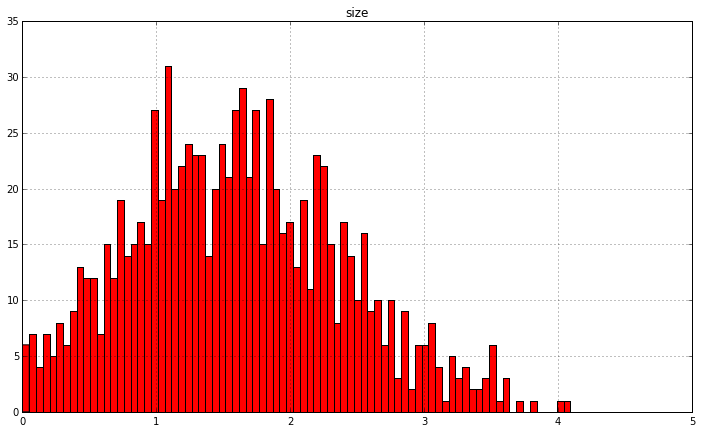

In [11]:
sigma = 0.9
errors = make_noise(sigma=sigma,N=1000)

observed = intrinsic + errors

observed.hist(bins=np.linspace(0.0,5.0,100),figsize=(12,7),color='red')

### Q: How did we do? Is this a good model for our data?

One last thing: let's look at the variances of these distributions:

In [12]:
print "Variance of the intrinsic distribution = ", np.var(intrinsic['size'])
print "Variance of the noise = ",np.var(errors['size'])
print "Variance of the observed distribution = ", np.var(observed['size']), \
  "cf", np.var(intrinsic['size']) + np.var(errors['size'])

Variance of the intrinsic distribution =  0.0285878087281
Variance of the noise =  0.757247636043
Variance of the observed distribution =  0.786755440984 cf 0.785835444771


You may recall this from previous statistics courses.

## Sampling Distributions

In the above example we drew *samples* from two *probability distributions*:

* The intrinsic size distribution, ${\rm Pr}(R_{\rm true}|\mu,S)$
* The "error" distribution, ${\rm Pr}(R_{\rm obs}|R,\sigma)$



The procedure of drawing numbers from the first, and then adding numbers from the second, produced *mock data* - which then appeared to have been drawn from:

* ${\rm Pr}(R_{\rm obs}|\mu,S)$

### Q: What would we do differently if we wanted to simulate 1 Galaxy, observed 1000 times?